# Google Drive

In [1]:
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras import regularizers

## Connecting Google Drive to Google Colab Notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

## uploading the dataset from kaggle to google colab through Kaggle API. 

In [ ]:
# #downloading the dataset
# uploaded = files.upload()
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# # Then copy kaggle.json into the folder where the API expects to find it.
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle
# !kaggle datasets download -d shristy07/edible-and-contaminated-data-sets
# #downloading the dataset from kaggle


## Copying the dataset zip folder and uploading it to our google drive fodler

In [3]:
#all imports

# this cell 1
import os
import cv2 
import glob
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#this cell 2
%cd /content/drive/MyDrive/Researchproject/dataset

[Errno 2] No such file or directory: '/content/drive/MyDrive/Researchproject/dataset'
/content


In [ ]:
#this cell 3
NotRottenImages = []
RottenImages = []
ls = os.listdir('Cont/Cont')
count = {}
for i in ls:
  count[i] = len(glob.glob(f'Cont/Cont/{i}/*.jpg'))

In [ ]:
#this cell 4
count #images count for contaminated images

{'Apricot': 109,
 'Banana(C)': 85,
 'Blueberry': 98,
 'Cauliflower': 75,
 'Chestnut(C)': 100,
 'Clementine(C)': 119,
 'Coconut(C)': 48,
 'Dates(C)': 28,
 'Garlic(C)': 70,
 'Granadilla(C)': 80,
 'Grape Blue(C)': 59,
 'Lemon(C)': 124,
 'Lichi(C)': 51,
 'Papaya(C)': 72,
 'Potato(C)': 152,
 'Pumpkin(C)': 55,
 'Strawberry(C)': 88,
 'Tomato(C)': 79,
 'Watermelon(C)': 45,
 'cabbage': 84,
 'capsicum': 100,
 'carrot': 129,
 'cherry wax red': 100,
 'chilli pepper(C)': 77,
 'corn(C)': 135,
 'cucumber(C)': 80,
 'eggplant(C)': 129,
 'fig(C)': 75,
 'ginger(C)': 61,
 'lettuce(C)': 74,
 'mango(C)': 104,
 'onion(C)': 129,
 'peas(C)': 72,
 'rotten Apple granny smith': 95,
 'rotten Apple pink lady': 69,
 'rotten Avocado': 100,
 'spinach(C)': 27}

In [ ]:
# this cell 5
NotRottenImages = []
RottenImages = []
ls = os.listdir('Edib/Edib')
count = {}
for i in ls:
  count[i] = len(glob.glob(f'Edib/Edib/{i}/*.jpg'))

In [ ]:
#this cell 6
count #images count for non-contaminated images

{'Apple Granny Smith(E)': 95,
 'Apple Pink Lady(E)': 70,
 'Apricot(E)': 109,
 'Avocado(E)': 100,
 'Banana(E)': 78,
 'Blueberry(E)': 98,
 'Cabbage(E)': 78,
 'Capsicum(E)': 100,
 'Carrot(E)': 124,
 'Cauliflower(E)': 100,
 'Cherry Wax Red(E)': 100,
 'Chilli Pepper(E)': 77,
 'Clementine(E)': 120,
 'Coconut(E)': 41,
 'Corn(E)': 135,
 'Cucumber(E)': 76,
 'Dates(E)': 30,
 'Eggplant(E)': 129,
 'Fig(E)': 100,
 'Garlic(E)': 72,
 'Ginger(E)': 80,
 'Granadilla(E)': 100,
 'Grape Blue(E)': 60,
 'Lemon(E)': 150,
 'Lettuce(E)': 77,
 'Lichi(E)': 52,
 'Mango(E)': 99,
 'Papaya(E)': 60,
 'Peas(E)': 80,
 'Potato(E)': 150,
 'Pumpkin(E)': 40,
 'Spinach(E)': 30,
 'Strawberry(E)': 115,
 'Watermelon(E)': 42,
 'chestnut(E)': 100,
 'onion(E)': 150,
 'tomato(E)': 93}

In [ ]:
# this cell 7
img = cv2.imread("Cont/Cont/Coconut(C)/08-1486529151-1isrottencoconutisinauspiciousthing-09-1486621603.jpg")

## displaying the picture of Contaminated And Contaminated Apricot 

In [ ]:
# this cell 8
img

array([[[ 83,  95, 105],
        [ 83,  95, 105],
        [ 82,  94, 104],
        ...,
        [101, 124, 140],
        [101, 124, 140],
        [100, 123, 139]],

       [[ 82,  94, 104],
        [ 82,  94, 104],
        [ 81,  93, 103],
        ...,
        [101, 124, 140],
        [101, 124, 140],
        [100, 123, 139]],

       [[ 81,  93, 103],
        [ 81,  93, 103],
        [ 80,  92, 102],
        ...,
        [101, 124, 140],
        [101, 124, 140],
        [100, 123, 139]],

       ...,

       [[ 97, 104, 113],
        [ 92,  99, 108],
        [ 88,  95, 104],
        ...,
        [108, 119, 133],
        [107, 118, 132],
        [115, 126, 140]],

       [[ 97,  99, 109],
        [ 97,  99, 109],
        [ 98, 100, 110],
        ...,
        [ 94, 111, 132],
        [ 93, 110, 131],
        [ 93, 110, 131]],

       [[105, 106, 116],
        [105, 106, 116],
        [106, 107, 117],
        ...,
        [100, 113, 129],
        [ 99, 112, 128],
        [ 99, 112, 128]]

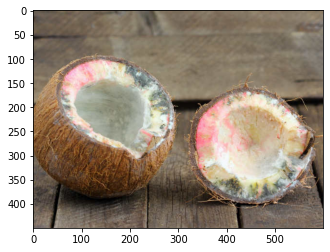

In [ ]:
# this cell 8
plt.imshow(img[:,:,::-1])

In [ ]:
# this ce9l 9
img = cv2.imread("Cont/Cont/Apricot/2772.jpg")

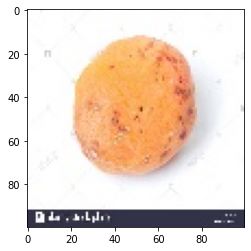

In [ ]:
# this cell 10
# plt.imshow(img)
plt.imshow(img[:,:,::-1])

## Data Augmentation

In [ ]:
# this cell 10

#generating new images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(
    rotation_range=65,
    shear_range=0.3,
    zoom_range=0.5,
    horizontal_flip=True,
    vertical_flip=True,
)

In [ ]:
# this cell 11

#reshaping the image
img.reshape((100,100,3,1))

array([[[[255],
         [255],
         [255]],

        [[253],
         [253],
         [253]],

        [[255],
         [255],
         [255]],

        ...,

        [[255],
         [255],
         [255]],

        [[255],
         [255],
         [255]],

        [[255],
         [255],
         [255]]],


       [[[254],
         [254],
         [254]],

        [[255],
         [255],
         [255]],

        [[255],
         [255],
         [255]],

        ...,

        [[255],
         [255],
         [255]],

        [[255],
         [255],
         [255]],

        [[255],
         [255],
         [255]]],


       [[[254],
         [254],
         [254]],

        [[255],
         [255],
         [255]],

        [[254],
         [254],
         [254]],

        ...,

        [[255],
         [255],
         [255]],

        [[255],
         [255],
         [255]],

        [[255],
         [255],
         [255]]],


       ...,


       [[[ 71],
         [ 47],
      

In [ ]:
# this cell 12 
# augmenting a single iamge

x = generator.flow(img.reshape((1,100,100,3)),batch_size=1)

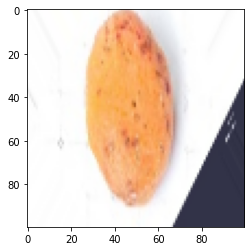

In [ ]:
#this cell 13
#displaying the augmented image

plt.imshow(x.next()[0].astype(np.uint8)[:,:,::-1])

In [ ]:

##generating new images

## reading new images

## Getting all Contaminated Images

In [ ]:
# this cell 13

cont_folders = os.listdir("Cont/Cont")
CONT_IMAGES = []
for cnt in cont_folders:
  images = os.listdir(f"Cont/Cont/{cnt}")
  print(f"Loading all {len(images)} contaminated {cnt} Images")
  for img in images:
    img = cv2.imread(f"Cont/Cont/{cnt}/{img}")
    img = cv2.resize(img,(100,100)) # Rescaling all images to 300 x 300
    img = img/float(img.max())
    CONT_IMAGES.append(img)

Loading all 109 contaminated Apricot Images
Loading all 100 contaminated Banana(C) Images
Loading all 98 contaminated Blueberry Images
Loading all 99 contaminated Cauliflower Images


In [ ]:
# this cell 15

#creating label for cont images = 0
CONT_IMAGES_Y = [0 for i in range(len(CONT_IMAGES))]

In [ ]:
#this cell 16

#dispalying size of Cont iamges and label
len(CONT_IMAGES), len(CONT_IMAGES_Y)

## Getting all Edible Images

In [ ]:
# this folder 17

edib_folders = os.listdir("Edib/Edib")
EDIB_IMAGES = []
for cnt in edib_folders:
  images = os.listdir(f"Edib/Edib/{cnt}")
  print(f"Loading all {len(images)} Edible {cnt} Images")
  for img in images:
    img = cv2.imread(f"Edib/Edib/{cnt}/{img}")
    img = cv2.resize(img,(100,100)) # Rescaling all images to 300 x 300
    img = img/float(img.max())
    EDIB_IMAGES.append(img)

In [ ]:
# this cell 17
#creating labels for edib iamges = 1
EDIB_IMAGES_Y = [1 for i in range(len(EDIB_IMAGES))]

In [ ]:
#this cell 18

#diaplying shape
len(EDIB_IMAGES), len(EDIB_IMAGES_Y)

## CONCATENATING BITH CONTAMINATED AND EDIBLE IMAGES

In [ ]:
# this cell 19

Y = EDIB_IMAGES_Y + CONT_IMAGES_Y #concatenating both y data
X = EDIB_IMAGES + CONT_IMAGES #concatenating both x data

In [ ]:
# this cell 20
#converting data into numpy arrays

X = np.array(X)
Y = np.array(Y)


In [ ]:
# this cell 21

#display the shape of both X and Y

X.shape, Y.shape

## splitting data into train, test and val format

In [ ]:
#----------------------------------------------
#this cell 22
#deleting old images variables

del(EDIB_IMAGES)
del(CONT_IMAGES)

In [ ]:
# from sklearn.utils import shuffle
# X, Y = shuffle(X, Y)


In [ ]:
#this cell 23
#splitting the datainto train and test set

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=9, shuffle=True)

In [ ]:
#this cell 24

#deleting old variables

del(X)
del(Y)

In [ ]:
del(EDIB_IMAGES_Y)
del(CONT_IMAGES_Y)

# Data Modeling

In [ ]:
# this cell 25

#importing the VGG19 model

from tensorflow.keras.applications import VGG19 

conv_base = VGG19(weights='imagenet',
include_top=False,
input_shape=(100, 100, 3))

print(conv_base.summary())

In [ ]:
# this cell 16

#connecting our modelwith vgg19 


model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())


In [ ]:
# Make last block of the conv_base trainable:


for layer in conv_base.layers[:]:
   layer.trainable = True

print('All block of the conv_base is now trainable')

In [ ]:
# this cell 27 



model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#this cell 28

#training the moidel

model.fit(xtrain,ytrain,epochs=20,batch_size=100)

In [ ]:
model.evaluate(xtest,ytest)

In [ ]:
model.save("/content/drive/MyDrive/ResearchProject/VGG19AllTrainable89.7.h5")

# MobileNetV3

In [ ]:
from tensorflow.keras.applications import MobileNetV3Large, MobileNetV3Small

conv_base = MobileNetV3Small(weights='imagenet',
include_top=True,
input_shape=(100, 100, 3))

print(conv_base.summary())

In [ ]:

model = Sequential()
model.add(conv_base)
model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

In [ ]:


# for layer in conv_base.layers[:200]:
#    layer.trainable = False

for layer in conv_base.layers[:]:
   layer.trainable = True

print('All block of the conv_base is now trainable')

In [ ]:
print("Total Layers: {}".format(len(conv_base.layers)))

In [ ]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,epochs=20,batch_size=200,validation_data  = (xtest,ytest))

In [ ]:
model.evaluate(xtest,ytest)

In [ ]:
del(model)

# Custom Model

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())



In [ ]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,epochs=50,batch_size=200,validation_data  = (xtest,ytest))

In [ ]:
del(model)